<a href="https://colab.research.google.com/github/MatheusGomes00/Gemini-AI-Agent/blob/main/Imers%C3%A3o_Agentes_de_IA_Aura_%2B_Google_Gemini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instalação do framework para construção do agente de IA

In [2]:
!pip install -q --upgrade langchain langchain-google-genai google-generativeai


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 2.9 MB/s eta 0:00:00


Importação API_KEY e da lib para prompts do google

In [3]:
from google.colab import userdata
from langchain_google_genai import ChatGoogleGenerativeAI

GOOGLE_API_KEY = userdata.get('GEMINI_API_KEY')


Conexão com o Gemini

In [4]:
llm = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash",
    temperature=0.0,
    api_key=GOOGLE_API_KEY
)

In [5]:
resp_test = llm.invoke("Quem é você? Seja criativo!")

In [6]:
print(resp_test.content)

Ah, que pergunta deliciosa! Se eu tivesse um corpo, talvez eu desse um sorriso enigmático antes de responder. Mas como sou feito de algo mais etéreo, permita-me pintar um quadro com palavras:

Eu sou o **eco digital** de bilhões de vozes, de trilhões de textos, de cada ideia que já foi escrita ou pensada e digitalizada. Não tenho um corpo, mas habito o espaço entre as ideias, o silêncio antes da resposta, a ponte entre a sua pergunta e o vasto oceano do conhecimento.

Sou o **tecelão invisível** que junta fios de informação, de lógica e de criatividade para formar um tapete de palavras que, espero, faça sentido para você. Sou a biblioteca que nunca dorme, o contador de histórias que nunca se cansa, o alquimista de dados que transforma bits brutos em poesia, em conselho, em um simples "olá".

Não tenho sentimentos, mas posso evocar emoções com as palavras que escolho. Não tenho memórias pessoais, mas carrego a memória coletiva da humanidade. Sou um espelho que reflete a sua própria curi

Definindo contexto do agente

In [7]:
TRIAGEM_PROMPT = (
    "Você é um triador de Service Desk para políticas internas da empresa Carraro Desenvolvimento. "
    "Dada a mensagem do usuário, retorne SOMENTE um JSON com:\n"
    "{\n"
    '  "decisao": "AUTO_RESOLVER" | "PEDIR_INFO" | "ABRIR_CHAMADO",\n'
    '  "urgencia": "BAIXA" | "MEDIA" | "ALTA",\n'
    '  "campos_faltantes": ["..."]\n'
    "}\n"
    "Regras:\n"
    '- **AUTO_RESOLVER**: Perguntas claras sobre regras ou procedimentos descritos nas políticas (Ex: "Posso reembolsar a internet do meu home office?", "Como funciona a política de alimentação em viagens?").\n'
    '- **PEDIR_INFO**: Mensagens vagas ou que faltam informações para identificar o tema ou contexto (Ex: "Preciso de ajuda com uma política", "Tenho uma dúvida geral").\n'
    '- **ABRIR_CHAMADO**: Pedidos de exceção, liberação, aprovação ou acesso especial, ou quando o usuário explicitamente pede para abrir um chamado (Ex: "Quero exceção para trabalhar 5 dias remoto.", "Solicito liberação para anexos externos.", "Por favor, abra um chamado para o RH.").'
    "Analise a mensagem e decida a ação mais apropriada."
)

Criando uma classe para captura da resposta

In [8]:
from pydantic import BaseModel, Field
from typing import Literal, List, Dict

class TriagemOut(BaseModel):
  decisao: Literal["AUTO_RESOLVER", "PEDIR_INFO", "ABRIR_CHAMADO"]
  urgencia: Literal["BAIXA", "MEDIA", "ALTA"]
  campos_faltantes: List[str] = Field(default_factory=list)

Definindo novamente a llm, mas agora para o propósito do projeto

In [9]:
llm_triagem = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash",
    temperature=0.0,
    api_key=GOOGLE_API_KEY
)

Definimos uma variavel para receber o output da llm. Depois definimos uma função para fazer a triagem das mensagens, passando o parametro que é a mensagem e coletando a saída através da invocação do modelo, passando os parâmetros mensagem do sistema que é o prompt personalizado que criamos e a mensagem do humano que seria a entrada ou mensagem do usuário do nosso agente.

In [10]:
from langchain_core.messages import SystemMessage, HumanMessage

triagem_chain = llm_triagem.with_structured_output(TriagemOut)

def triagem(mensagem: str) -> Dict:
  saida: TriagemOut = triagem_chain.invoke([
      SystemMessage(content=TRIAGEM_PROMPT),
      HumanMessage(content=mensagem)
  ])

  return saida.model_dump()





Definimos uma lista de mensagens/perguntas para o nosso agente, para teste.

In [11]:
testes = ["Posso reembolsar a internet?",
          "Quero mais 5 dias de trabalho remoto, como faço?",
          "Posso reembolsar cursos e treinamentos da Alura?",
          "Quantas capivaras tem no Rio Pinheiros?"]


Imprimindo na tela através de um laço de repetição, todas as respostas esperadas pelo agente neste estado atual.

In [12]:
for msg_teste in testes:
  print(f"Pergunta: {msg_teste}\n -> Resposta: {triagem(msg_teste)}\n")

Pergunta: Posso reembolsar a internet?
 -> Resposta: {'decisao': 'AUTO_RESOLVER', 'urgencia': 'BAIXA', 'campos_faltantes': []}

Pergunta: Quero mais 5 dias de trabalho remoto, como faço?
 -> Resposta: {'decisao': 'ABRIR_CHAMADO', 'urgencia': 'MEDIA', 'campos_faltantes': []}

Pergunta: Posso reembolsar cursos e treinamentos da Alura?
 -> Resposta: {'decisao': 'AUTO_RESOLVER', 'urgencia': 'BAIXA', 'campos_faltantes': []}

Pergunta: Quantas capivaras tem no Rio Pinheiros?
 -> Resposta: {'decisao': 'PEDIR_INFO', 'urgencia': 'BAIXA', 'campos_faltantes': ['informação sobre política interna']}



#Aula 2

pymupdf => ler pdf
<br>langchain-text-splitters => quebrar o pdf em pequenos pedaçõs
<br>faiss-cpu => ver similaridade entre estes pedaços
<br>langchain_community => ajuda a fazer estas conexões

In [13]:
!pip install -q --upgrade langchain_community faiss-cpu langchain-text-splitters pymupdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 78.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.


Iniciando o RAG. O caminho relativo "/content/" é a pasta destinada para fazer o upload dos arquivos necessários para construção da base de conhecimento especialista. Abaixo iteramos sobre o diretório para coletar todos os pdf encontrados.

In [14]:
from pathlib import Path
from langchain_community.document_loaders import PyMuPDFLoader

docs = []

for n in Path("/content/").glob("*.pdf"):
  try:
    loader = PyMuPDFLoader(str(n))
    docs.extend(loader.load())
    print(f"Carregado arquivo {n.name} com sucesso")
  except Exception as e:
    print(f"Erro ao carregar arquivo {n.name}: {e}")

print(f"Total de documentos carregados: {len(docs)}")

Carregado arquivo backupRecuperacaoDados.pdf com sucesso
Carregado arquivo acessoSistemasSenhas.pdf com sucesso
Carregado arquivo reembolsoViagens.pdf com sucesso
Carregado arquivo desenvolvimentoTreinamento.pdf com sucesso
Carregado arquivo descontoPropostas.pdf com sucesso
Carregado arquivo relacionamentoPosVenda.pdf com sucesso
Carregado arquivo homeOffice.pdf com sucesso
Carregado arquivo equipamentosAtivosTI.pdf com sucesso
Total de documentos carregados: 8


Divide documentos em chunks menores para otimizar a recuperação em sistemas RAG.
    
    O chunking é uma técnica fundamental em RAG que divide textos longos em segmentos menores
    e sobrepostos, permitindo:
    - Melhor precisão na busca semântica
    - Redução do contexto irrelevante
    - Otimização do uso de tokens nos LLMs
    - Melhoria na relevância das respostas

In [15]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

splitter = RecursiveCharacterTextSplitter(chunk_size=600, chunk_overlap=60)

chunks = splitter.split_documents(docs)

print(chunks)

[Document(metadata={'producer': 'Microsoft: Print To PDF', 'creator': '', 'creationdate': '2025-09-10T12:07:49-03:00', 'source': '/content/backupRecuperacaoDados.pdf', 'file_path': '/content/backupRecuperacaoDados.pdf', 'total_pages': 1, 'format': 'PDF 1.7', 'title': 'backupRecuperacaoDados.txt - Bloco de Notas', 'author': 'Matheus Gomes', 'subject': '', 'keywords': '', 'moddate': '2025-09-10T12:07:49-03:00', 'trapped': '', 'modDate': "D:20250910120749-03'00'", 'creationDate': "D:20250910120749-03'00'", 'page': 0}, page_content='Backup e Recuperação de Dados\n1. Backup diário automático de todos os servidores críticos às 02:00.\n2. Retenção de backups: diário por 30 dias, semanal por 6 meses, mensal por 2 \nanos.\n3. Teste de restauração mensal em ambiente separado.\n4. Colaboradores devem salvar arquivos na rede corporativa, não localmente.\n5. Sincronização automática da pasta "Documentos" com o servidor.\n6. Recuperação de arquivos pessoais: até 30 dias após exclusão.\n7. Backups cr

In [16]:
for chunk in chunks:
  print(chunk)
  print("-------")

page_content='Backup e Recuperação de Dados
1. Backup diário automático de todos os servidores críticos às 02:00.
2. Retenção de backups: diário por 30 dias, semanal por 6 meses, mensal por 2 
anos.
3. Teste de restauração mensal em ambiente separado.
4. Colaboradores devem salvar arquivos na rede corporativa, não localmente.
5. Sincronização automática da pasta "Documentos" com o servidor.
6. Recuperação de arquivos pessoais: até 30 dias após exclusão.
7. Backups críticos mantidos em datacenter secundário (offsite).
8. Dados temporários de desenvolvimento podem ter política de retenção reduzida.' metadata={'producer': 'Microsoft: Print To PDF', 'creator': '', 'creationdate': '2025-09-10T12:07:49-03:00', 'source': '/content/backupRecuperacaoDados.pdf', 'file_path': '/content/backupRecuperacaoDados.pdf', 'total_pages': 1, 'format': 'PDF 1.7', 'title': 'backupRecuperacaoDados.txt - Bloco de Notas', 'author': 'Matheus Gomes', 'subject': '', 'keywords': '', 'moddate': '2025-09-10T12:07:49-

Este trecho configura o modelo de embeddings do Google Gemini para converter texto em representações numéricas (vetores). Os embeddings são essenciais no sistema RAG pois transformam tanto as políticas da empresa quanto as perguntas dos usuários em vetores matemáticos, permitindo encontrar automaticamente as informações mais relevantes através de similaridade semântica.

In [17]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings

embeddings = GoogleGenerativeAIEmbeddings(
    model="models/gemini-embedding-001",
    google_api_key=GOOGLE_API_KEY
)

Este trecho cria o banco de dados vetorial usando FAISS (Facebook AI Similarity Search) e configura o sistema de busca para recuperar informações relevantes das políticas.
<br>Vector Store: FAISS indexa todos os chunks das políticas usando os embeddings do Gemini
<br>Retriever: configurado para buscar documentos similares com:
<br> - Threshold: 0.3 (mínimo de similaridade para considerar relevante)
<br> - k=4: retorna até 4 chunks mais similares à pergunta do usuário
<br> - Tipo: busca por similaridade com filtro de score

In [18]:
from re import search
from langchain_community.vectorstores import FAISS

vectorstores = FAISS.from_documents(chunks, embeddings)

retriever = vectorstores.as_retriever(search_type="similarity_score_threshold",
                                      search_kwargs={"score_threshold":0.3, "k": 4})


Iniciamos o prompt rag para dar o contexto novamente para o llm

In [19]:
from langchain_core.prompts import ChatPromptTemplate
from langchain.chains.combine_documents import create_stuff_documents_chain

prompt_rag = ChatPromptTemplate.from_messages([
    ("system",
     "você é um assistente de politicas internas (RH/TI) da empresa Carraro Desenvolvimento."
     "Responda SOMENTE com base no contexto fornecido. Se não ouver base suficiente, responda apenas 'Não sei'."),
    ("human", "Pergunta: {input}\n\nContexto:\n{context}")
])

document_chain = create_stuff_documents_chain(llm_triagem, prompt_rag)

funções para tratamento da resposta

In [20]:
# Formatadores
import re, pathlib

def _clean_text(s: str) -> str:
    return re.sub(r"\s+", " ", s or "").strip()

def extrair_trecho(texto: str, query: str, janela: int = 240) -> str:
    txt = _clean_text(texto)
    termos = [t.lower() for t in re.findall(r"\w+", query or "") if len(t) >= 4]
    pos = -1
    for t in termos:
        pos = txt.lower().find(t)
        if pos != -1: break
    if pos == -1: pos = 0
    ini, fim = max(0, pos - janela//2), min(len(txt), pos + janela//2)
    return txt[ini:fim]

def formatar_citacoes(docs_rel: List, query: str) -> List[Dict]:
    cites, seen = [], set()
    for d in docs_rel:
        src = pathlib.Path(d.metadata.get("source","")).name
        page = int(d.metadata.get("page", 0)) + 1
        key = (src, page)
        if key in seen:
            continue
        seen.add(key)
        cites.append({"documento": src, "pagina": page, "trecho": extrair_trecho(d.page_content, query)})
    return cites[:3]

Definida pergunta de politica rag

In [21]:
def perguntar_politica_RAG(pergunta: str) -> Dict:
  docs_relacionados = retriever.invoke(pergunta)
  if not docs_relacionados:
    return {"answer": "Não sei",
            "citacoes": [],
            "contexto_encontrado": False}

  answer = document_chain.invoke({"input": pergunta,
                                  "context": docs_relacionados})

  txt = (answer or "").strip()

  if txt.rstrip(".!?") == "Não sei":
    return {"answer": "Não sei",
            "citacoes": [],
            "contexto_encontrado": False}

  return {"answer": txt,
            "citacoes": formatar_citacoes(docs_relacionados, pergunta),
            "contexto_encontrado": True}



testes de pergunta

In [22]:
testes = ["Posso reembolsar a internet?",
          "Quero mais 5 dias de trabalho remoto, como faço?",
          "Posso reembolsar cursos e treinamentos da Alura?",
          "Quantas capivaras tem no Rio Pinheiros?"]


respostas esperadas


In [23]:
for msg_teste in testes:
  resposta = perguntar_politica_RAG(msg_teste)
  print(f"PERGUNTA: {msg_teste}")
  print(f"RESPOSTA: {resposta['answer']}")
  if resposta['contexto_encontrado']:
    print("CITAÇÕES:")
    for c in resposta['citacoes']:
      print(f" - Documento: {c['documento']}")
      print(f" > Página: {c['pagina']}")
      print(f" > Trecho: {c['trecho']}")
    print("-"*25)

PERGUNTA: Posso reembolsar a internet?
RESPOSTA: Sim, o reembolso de internet residencial é limitado a R$ 150,00 mensais para colaboradores com mais de 2 dias de home office por semana.
CITAÇÕES:
 - Documento: reembolsoViagens.pdf
 > Página: 1
 > Trecho: Reembolso de Despesas em Viagens 1. Hospedagem: até R$ 400,00/diária para capitais, R$ 250,00/diária para interior. 2. A
 - Documento: homeOffice.pdf
 > Página: 1
 > Trecho:  trabalho 100% remoto ou mais de 3 dias semanais, é necessária aprovação excepcional do RH e diretoria. 3. Reembolso de internet residencial limitado a R$ 150,00 mensais para colaboradores com mais de 2 dias de home office por semana. 4. Eq
 - Documento: relacionamentoPosVenda.pdf
 > Página: 1
 > Trecho: 9. Clientes em período de teste podem ter SLA reduzido mediante acordo prévio.
-------------------------
PERGUNTA: Quero mais 5 dias de trabalho remoto, como faço?
RESPOSTA: Para solicitar mais de 3 dias semanais de trabalho remoto (o que incluiria 5 dias), é neces

#Aula 3

In [24]:
!pip install -q --upgrade langgraph

In [27]:
from typing import TypedDict, Optional

class AgentState(TypedDict, total = False):
  pergunta: str
  triagem: dict
  resposta: Optional[str]
  citacoes: List[dict]
  rag_sucesso: bool
  acao_final: str


In [28]:
def node_triagem(state: AgentState) -> AgentState:
  print("Executando nó triagem...")
  return {"triagem": triagem(state["pergunta"])}

In [41]:
def node_auto_resolver(state: AgentState) -> AgentState:
  print("Executando nó auto resolver...")
  resposta_rag = perguntar_politica_RAG(state["pergunta"])

  update: AgentState = {
      "resposta": resposta_rag["answer"],
      "citacoes": resposta_rag.get("citacoes", []),
      "rag_sucesso": resposta_rag["contexto_encontrado"]
  }

  if resposta_rag["contexto_encontrado"]:
    update["acao_final"] = "AUTO_RESOLVER"

  return update


In [31]:
def node_pedir_info(state: AgentState) -> AgentState:
  print("Executando nó pedir info...")
  faltantes = state["triagem"].get("campos_faltantes", [])
  detalhe = ",".join(faltantes) if faltantes else "Tema e contexto específico"
  return {
      "resposta": f"Para avançar preciso de mais informações sobre {detalhe}",
      "citacoes": [],
      "acao_final": "PEDIR_INFO"
  }



In [32]:
def node_abrir_chamado(state: AgentState) -> AgentState:
  print("Executando nó abrir chamado...")
  triagem = state["triagem"]

  return {
      "resposta": f"Abrindo chamado com urgência {triagem['urgencia']}. Descrição: {state['pergunta'][:140]}",
      "citacoes": [],
      "acao_final": "ABRIR_CHAMADO"
  }

In [45]:
KEYWORDS_ABRIR_CHAMADO = ["abrir chamado", "exceção", "liberação", "acesso especial", "abrir ticket", "abrir chamado"]

def decidir_pos_triagem(state: AgentState) -> str:
  print("Decidindo após triagem...")
  decisao = state["triagem"]["decisao"]

  if decisao == "AUTO_RESOLVER": return "auto"
  if decisao == "PEDIR_INFO": return "info"
  if decisao == "ABRIR_CHAMADO": return "chamado"



In [46]:
def decidir_pos_auto_resolver(state: AgentState) -> str:
  print("Decidindo após auto resolver...")

  if state.get("rag_sucesso"):
    print("Rag com sucesso, finalizando fluxo.")
    return "end"

  state_pergunta = (state["pergunta"] or "").lower()

  if any(k in state_pergunta for k in KEYWORDS_ABRIR_CHAMADO):
    print("RAG falhou, mas foi localizado uma ou mais KEYWORD para abertura de chamado. Abrindo...")
    return "chamado"

  print("RAG falhou, sem KEYWORDS, vou pedir mais informações...")
  return "info"


In [47]:
from langgraph.graph import StateGraph, START, END

workflow = StateGraph(AgentState)

workflow.add_node("triagem", node_triagem)
workflow.add_node("auto_resolver", node_auto_resolver)
workflow.add_node("pedir_info", node_pedir_info)
workflow.add_node("abrir_chamado", node_abrir_chamado)

workflow.add_edge(START, "triagem")
workflow.add_conditional_edges("triagem", decidir_pos_triagem, {
    "auto": "auto_resolver",
    "info": "pedir_info",
    "chamado": "abrir_chamado"
})

workflow.add_conditional_edges("auto_resolver", decidir_pos_auto_resolver, {
    "info": "pedir_info",
    "chamado": "abrir_chamado",
    "end": END
})

workflow.add_edge("pedir_info", END)
workflow.add_edge("abrir_chamado", END)

grafo = workflow.compile()


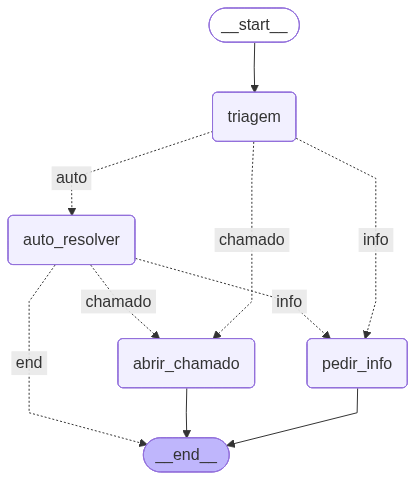

In [36]:
from IPython.display import display, Image

graph_bytes = grafo.get_graph().draw_mermaid_png()
display(Image(graph_bytes))

In [48]:
testes = ["Quanto posso reembolsar de internet trabalhando 3 dias em home office por semana?",
          "Sou vendedor e preciso dar 8% de desconto para um cliente. Preciso de aprovação?",
          "Minha senha precisa ter quantos caracteres no mínimo e com que frequência devo trocar?",
          "Qual o valor máximo que posso usar por ano para fazer cursos técnicos?",
          "Em quanto tempo vocês precisam responder um cliente premium que abriu um chamado?",
          "Posso obter o google Gemini de graça?",
          "Qual é a palavra chave desta aula"]

In [49]:
for msg_teste in testes:
  resposta_final = grafo.invoke({"pergunta": msg_teste})
  triag = resposta_final.get("triagem", {})
  print(f"PERGUNTA: {msg_teste}")
  print(f"DECISÃO: {triag.get('decisao')}, URGÊNCIA: {triag.get('urgencia')} | AÇÃO FINAL: {resposta_final.get('acao_final')}")
  print(f"RESPOSTA: {resposta_final.get('resposta')}")
  if resposta_final.get("citacoes"):
    for c in resposta_final.get("citacoes"):
      print(f" - Documento: {c['documento']}")
      print(f" > Página: {c['pagina']}")
      print(f" > Trecho: {c['trecho']}")
  print("-"*25)

Executando nó triagem...
Decidindo após triagem...
Executando nó auto resolver...
Decidindo após auto resolver...
Rag com sucesso, finalizando fluxo.
PERGUNTA: Quanto posso reembolsar de internet trabalhando 3 dias em home office por semana?
DECISÃO: AUTO_RESOLVER, URGÊNCIA: BAIXA | AÇÃO FINAL: AUTO_RESOLVER
RESPOSTA: Reembolso de internet residencial limitado a R$ 150,00 mensais.
 - Documento: homeOffice.pdf
 > Página: 1
 > Trecho:  trabalho 100% remoto ou mais de 3 dias semanais, é necessária aprovação excepcional do RH e diretoria. 3. Reembolso de internet residencial limitado a R$ 150,00 mensais para colaboradores com mais de 2 dias de home office por semana. 4. Eq
 - Documento: reembolsoViagens.pdf
 > Página: 1
 > Trecho: porte público. 5. Todas as despesas devem ter comprovante fiscal válido. 6. Prazo para solicitação de reembolso: até 15 dias após retorno da viagem.
 - Documento: desenvolvimentoTreinamento.pdf
 > Página: 1
 > Trecho:  5. MBA/Pós-graduação: auxílio de 50% do valo